In [ ]:
# Linear Regression
# steps to be followed 

#data import 
#data cleaning-->null,replace
#Sampling-->train_test_splite
#Linreg
#Build Model-->fit
#linreg.score-->Rsquare
#AdjRsquare
#linreg.intercept_
#linreg.coef_
#pred-->train_x,test_x
#err_train
#err_mean()
#hist plot
#skew()
#kurt+3
#scatter plot
#data fram-->x=Actual y=pred
#regplot
#err_test
#mse
#rmse
#mape
#acc
# To be taken as note
# 1) data should be numeric and continuous only
# 2) hist should be normaly distributed
# 3) Data should be equaly scattered
# 4) in regplot all data should be linear pred line

In [1]:
import pandas as pd

In [2]:
##Lung Cap ##

In [3]:
pd.read_csv(r'C:\Users\Mrunal Kulkarni\Downloads\LungCapData.csv')

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no
...,...,...,...,...,...,...
720,5.725,9,56.0,no,female,no
721,9.050,18,72.0,yes,male,yes
722,3.850,11,60.5,yes,female,no
723,9.825,15,64.9,no,female,no


In [4]:
lung=pd.read_csv(r'C:\Users\Mrunal Kulkarni\Downloads\LungCapData.csv')

In [6]:
lung.isnull().sum()[lung.isnull().sum()>0]

Series([], dtype: int64)

In [8]:
lung.Smoke.replace({'no':0,'yes':1},inplace=True)
lung.Gender.replace({'male':1,'female':0},inplace=True)
lung.Caesarean.replace({'no':0,'yes':1},inplace=True)

In [9]:
lung.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,1,0
1,10.125,18,74.7,1,0,0
2,9.550,16,69.7,0,0,1
3,11.125,14,71.0,0,1,0
4,4.800,5,56.9,0,1,0


In [10]:
from sklearn.model_selection import train_test_split
lung_train,lung_test=train_test_split(lung,test_size=.2)

In [11]:
lung_train_x=lung_train.iloc[::,1:]
lung_train_y=lung_train.iloc[::,0]

In [12]:
lung_test_x=lung_test.iloc[::,1:]
lung_test_y=lung_test.iloc[::,0]

In [13]:
lung_test_x

,Age,Height,Smoke,Gender,Caesarean
692,13,58.4,0,0,0
616,15,76.6,0,1,1
220,14,59.7,1,0,1
422,8,59.4,0,1,0
91,14,69.4,0,1,0
...,...,...,...,...,...
397,16,70.1,0,0,0
369,18,73.3,0,1,0
546,8,69.3,0,1,1
606,16,66.3,0,0,0


In [14]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [15]:
linreg.fit(lung_train_x,lung_train_y)

LinearRegression()

In [22]:
linreg.score(lung_train_x,lung_train_y) #closer to 1

0.8563364162188528

In [17]:
lung_train_x.shape[0]

580

In [18]:
lung_train_x.shape[1]

5

In [21]:
Rsquare=linreg.score(lung_train_x,lung_train_y)  #closer to 1
n=lung_train_x.shape[0]
k=lung_train_x.shape[1]

adjrsquare=1-(1-Rsquare)*(n-1)/(n-k-1)
adjrsquare

0.8550849912730241

In [24]:
linreg.intercept_

np.float64(-11.293584659841278)

In [34]:
pred_train=linreg.predict(lung_train_x)
pred_test=linreg.predict(lung_test_x)

In [35]:
err_train=lung_train_y-pred_train

In [36]:
err_train

155   -0.504172
483    0.620644
157    1.601157
141   -0.382815
713    0.706864
         ...   
368   -1.490307
11     0.185677
294   -0.341509
602   -0.992384
103   -0.463235
Name: LungCap, Length: 580, dtype: float64

In [37]:
err_train.mean()

np.float64(-9.371813669939253e-16)

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

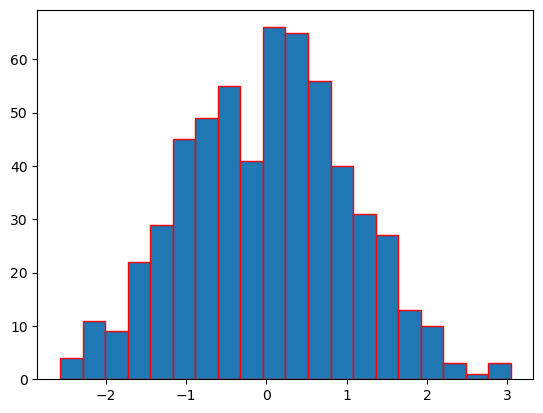

In [39]:
plt.hist(err_train,edgecolor='red',bins=20);

In [40]:
err_train.skew()

np.float64(0.027383550222506495)

In [41]:
err_train.kurtosis()+3

np.float64(2.6849931919339447)

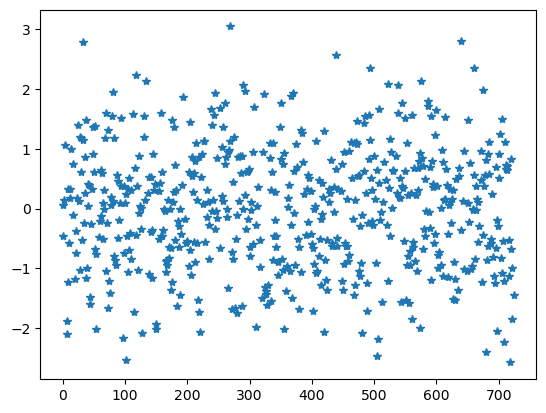

In [42]:
plt.plot(err_train,'*')

In [43]:
pred_act=pd.DataFrame()
pred_act['Actual']=lung_train_y
pred_act['Pred']=pred_train

<Axes: xlabel='Actual', ylabel='Pred'>

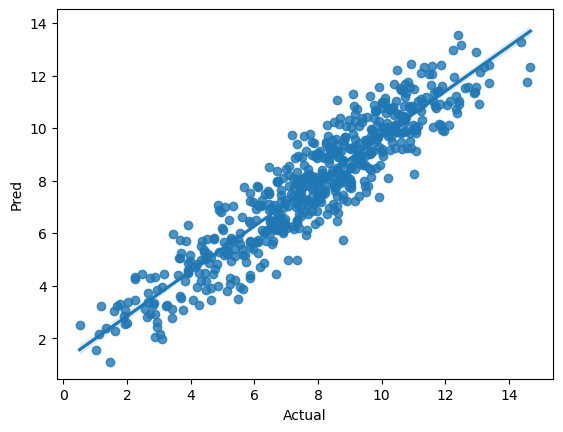

In [44]:
sns.regplot(x='Actual',y='Pred',data=pred_act)

In [46]:
err_test=lung_test_y-pred_test
err_test

692   -0.128559
616   -0.790289
220    0.829230
422   -0.080079
91    -0.442237
         ...   
397    0.756009
369    0.326157
546    0.027252
606    1.128851
152    1.397091
Name: LungCap, Length: 145, dtype: float64

In [47]:
import numpy as np

In [51]:
mse= np.mean(np.square(err_test))
mse

np.float64(1.048300518989112)

In [53]:
np.sqrt(mse)

np.float64(1.0238654789517576)

In [55]:
mape=np.mean(np.abs(err_test*100/lung_test_y))
mape

np.float64(11.75803762814888)

In [56]:
acc=100-mape
acc

np.float64(88.24196237185112)